<a href="https://colab.research.google.com/github/mariapaulasedano15/mpss0315/blob/main/04_Primeros_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit,learning_curve

In [ ]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier,LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)

In [ ]:
url = 'https://raw.githubusercontent.com/AlejandroMesa2/Costa-Rican-Household-Poverty-Level-Prediction/main/Datasets/CostaRicanHouseholdPovertyLevel_analized.csv'
df = pd.read_csv(url)
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t1,r4t2,...,area2,age,Target,temp_abastagua,temp_sanitario,temp_elimbasu,ecasa1,ecasa2,ecasa3,temp_instlevel
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,...,0,43,4.0,abastaguadentro,sanitario2,elimbasu1,0,0,0,instlevel4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,...,0,67,4.0,abastaguadentro,sanitario2,elimbasu1,0,1,0,instlevel8
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,1,...,0,92,4.0,abastaguadentro,sanitario2,elimbasu1,0,0,0,instlevel5
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,1,3,...,0,17,4.0,abastaguadentro,sanitario2,elimbasu1,0,0,1,instlevel4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,1,3,...,0,37,4.0,abastaguadentro,sanitario2,elimbasu1,0,0,1,instlevel5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,1,2,1,1,1,0.0,1,5,...,1,10,NaN,abastaguadentro,sanitario3,elimbasu3,1,0,0,instlevel2
33409,ID_1a7c6953b,0.0,0,3,0,1,1,0.0,0,4,...,1,54,NaN,abastaguadentro,sanitario3,elimbasu2,0,0,1,instlevel3
33410,ID_07dbb4be2,0.0,0,3,0,1,1,0.0,0,4,...,1,12,NaN,abastaguadentro,sanitario3,elimbasu2,0,0,1,instlevel2
33411,ID_34d2ed046,0.0,0,3,0,1,1,0.0,0,4,...,1,12,NaN,abastaguadentro,sanitario3,elimbasu2,0,0,1,instlevel2


En el análisis de datos, se dejaron accidentalmente columnas temporales, se procede a eliminarlas

In [ ]:
df.drop(df.columns[df.columns.str.startswith('temp_')], axis=1, inplace=True)
df


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t1,r4t2,...,lugar4,lugar5,lugar6,area1,area2,age,Target,ecasa1,ecasa2,ecasa3
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,...,0,0,0,1,0,43,4.0,0,0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,...,0,0,0,1,0,67,4.0,0,1,0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,1,...,0,0,0,1,0,92,4.0,0,0,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,1,3,...,0,0,0,1,0,17,4.0,0,0,1
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,1,3,...,0,0,0,1,0,37,4.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,1,2,1,1,1,0.0,1,5,...,0,0,1,0,1,10,NaN,1,0,0
33409,ID_1a7c6953b,0.0,0,3,0,1,1,0.0,0,4,...,0,0,1,0,1,54,NaN,0,0,1
33410,ID_07dbb4be2,0.0,0,3,0,1,1,0.0,0,4,...,0,0,1,0,1,12,NaN,0,0,1
33411,ID_34d2ed046,0.0,0,3,0,1,1,0.0,0,4,...,0,0,1,0,1,12,NaN,0,0,1


Se divide nuevamente el dataset en train y test después de que se considera terminado el preprocesado.
Además se separa en el train los datos del target y se eliminan los datos null correspondientes a la columna target en test

In [ ]:
train = df.select_dtypes(include = 'number')[df['Target'].notnull()]
test = df.select_dtypes(include = 'number')[df['Target'].isnull()]
datos = [col for col in train.columns if col != 'Target']
X, y = train[datos], train['Target']
test.drop(columns = 'Target', inplace = True)

Se utiliza un método no supervisado de clasificación de árbol de desición

In [ ]:
tree = DecisionTreeClassifier(max_features= 500,max_depth=15, class_weight='balanced')
tree.fit(X,y)
score = cross_val_score(tree, X, y, cv = 5, scoring = 'f1_macro')
score.mean()

0.31347836190036976

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=10, max_features= 200, n_jobs = -1 ,class_weight= 'balanced')
cv_score = cross_val_score(model, X, y, cv = 5, scoring = 'f1_macro')
cv_score.mean()

0.3188581613641414

In [ ]:
"""
ets = []
for i in range(10):
    rf = RandomForestClassifier(random_state=100+10*i, n_jobs=4, n_estimators=700,max_features=200, class_weight= 'balanced')
    ets.append(('rf{}'.format(i), rf)) 

vclf = VotingClassifier(ets, voting= 'hard')
cv_score = cross_val_score(vclf, X, y, cv= 5, scoring = 'f1_macro')
"""

In [ ]:
#cv_score.mean()

0.32904041875517037

In [ ]:
cv_score

array([0.37015188, 0.31355081, 0.34532839, 0.20837449, 0.35688523])

In [ ]:
cv_predict = cross_val_predict(model, X, y, cv = 5)

In [ ]:
confusion_matrix(y, cv_predict)

array([[ 118,  252,   39,  346],
       [ 180,  371,   96,  950],
       [  82,  214,   99,  814],
       [ 187,  536,  496, 4777]])

<Axes: >

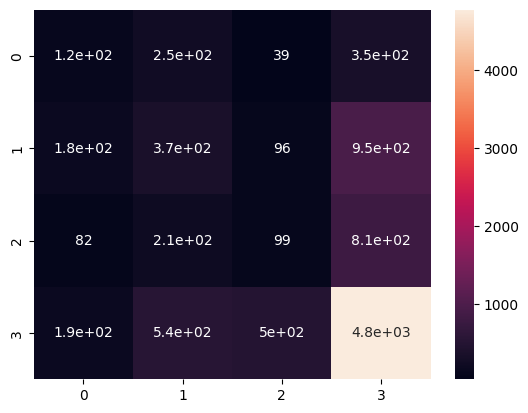

In [ ]:
sns.heatmap(confusion_matrix(y, cv_predict),annot=True)

In [ ]:
clf1 = LogisticRegression(random_state=200,solver='newton-cg',class_weight= 'balanced',max_iter=1000)
clf2 = RandomForestClassifier(random_state=160, n_jobs=4, n_estimators=700, class_weight= 'balanced')
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
  scores = cross_val_score(clf, X, y, scoring='f1_macro', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.32 (+/- 0.09) [Logistic Regression]
Accuracy: 0.37 (+/- 0.04) [Random Forest]
Accuracy: 0.30 (+/- 0.02) [naive Bayes]
Accuracy: 0.34 (+/- 0.05) [Ensemble]


In [ ]:
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_macro')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Precisión")
    plt.grid()

    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g",)
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Precisión en Entrenamiento")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Precisión en Prueba")
    plt.legend(loc="best")
    plt.show()

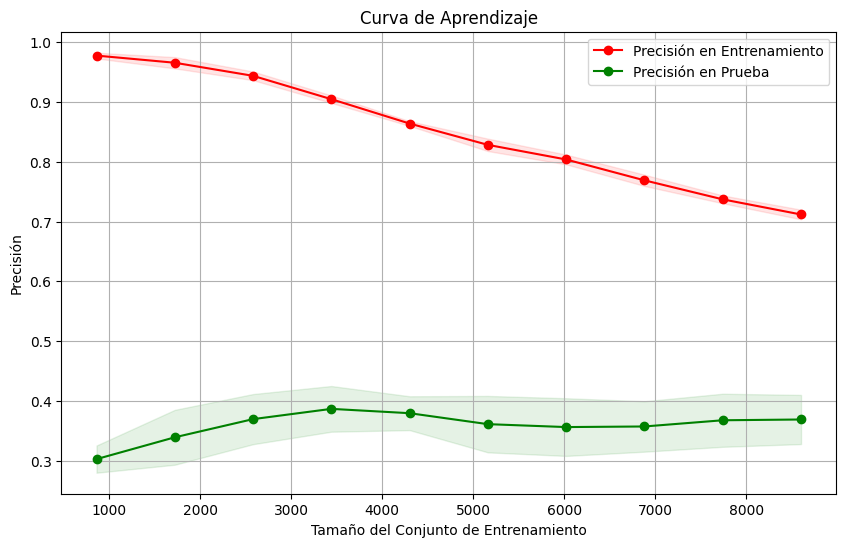

In [ ]:
model1 = RandomForestClassifier(random_state=160, n_jobs=4, n_estimators=700, min_impurity_decrease=1e-3, min_samples_leaf=2, verbose=0, class_weight= 'balanced')
train_sizes = np.linspace(0.1, 1.0, 10)

plot_learning_curve(model1,X,y,cv=10,train_sizes=train_sizes)


Overfitting

Se prueba bajar los n_estimators y el cv

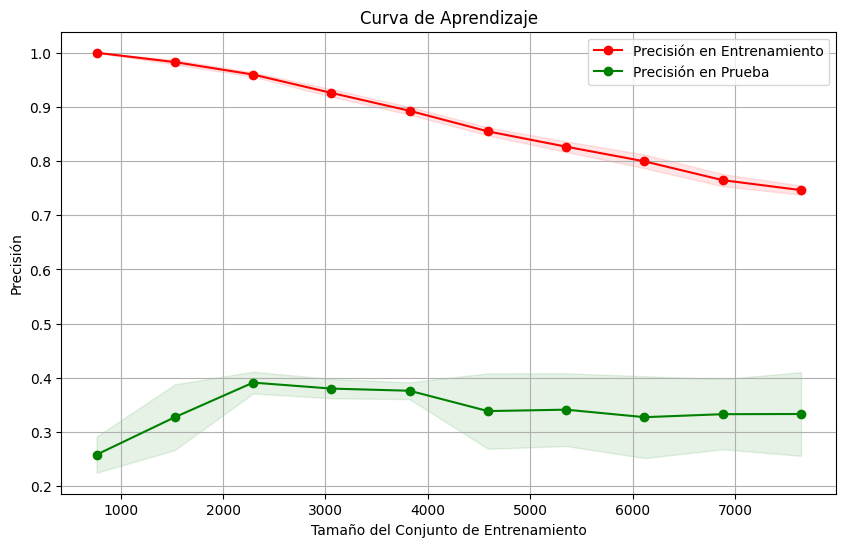

In [ ]:
model1 = RandomForestClassifier(random_state=160, n_jobs=4, n_estimators=100, min_impurity_decrease=1e-3, min_samples_leaf=1, verbose=0, class_weight= 'balanced')
train_sizes = np.linspace(0.1, 1.0, 10)

plot_learning_curve(model1,X,y,cv=5,train_sizes=train_sizes)

El modelo no funciona tampoco reduciendo su complejidad

In [ ]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring='f1_macro', n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)
        train_sizes = np.linspace(0.1, 1.0, 10)
        plot_learning_curve(model,X,y,cv=5,train_sizes=train_sizes)
        return model_results

10 Fold CV Score: 0.26465 with std: 0.0372


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


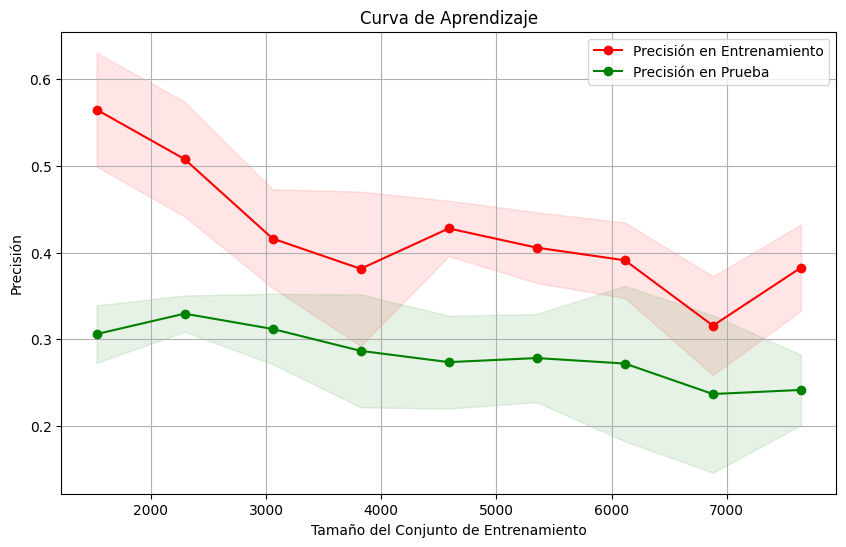

In [ ]:
from sklearn.svm import LinearSVC
model_results = cv_model(X, y, LinearSVC(C=3,class_weight='balanced'), 'LSVC3', model_results)

10 Fold CV Score: 0.27693 with std: 0.06091


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


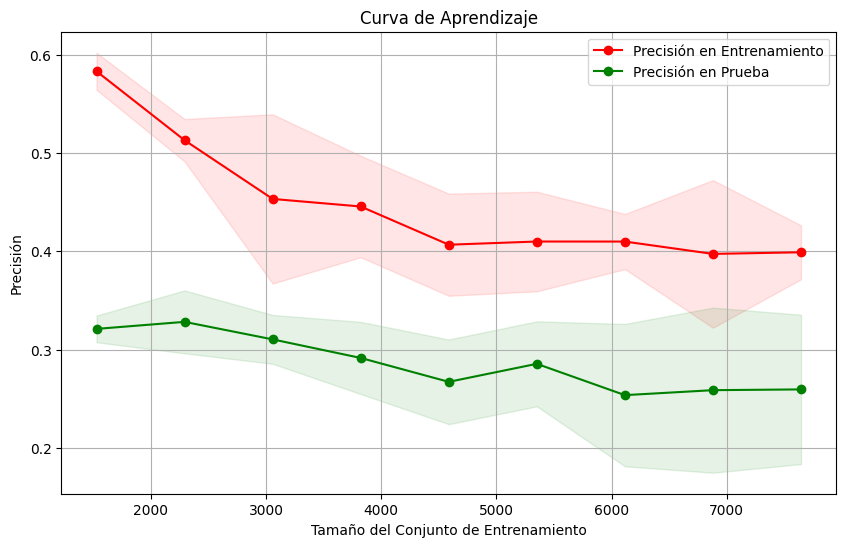

In [ ]:
model_results = cv_model(X, y, LinearSVC(C=1,class_weight='balanced'), 'LSVC1', model_results)

10 Fold CV Score: 0.30352 with std: 0.05707


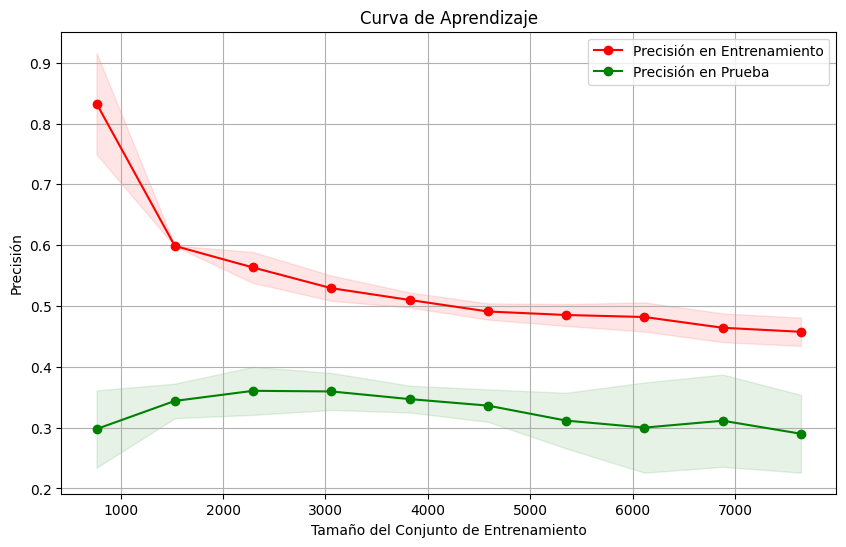

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_results = cv_model(X, y, LinearDiscriminantAnalysis(), 'LDA', model_results)

10 Fold CV Score: 0.29228 with std: 0.03159


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


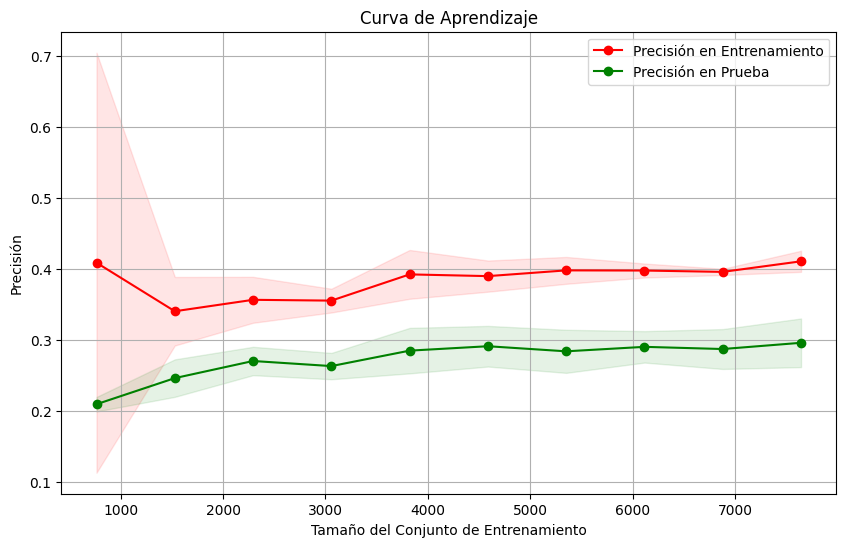

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n=20
model_results = cv_model(X, y, KNeighborsClassifier(n_neighbors = n),f'knn-{n}', model_results)

10 Fold CV Score: 0.31553 with std: 0.0284


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


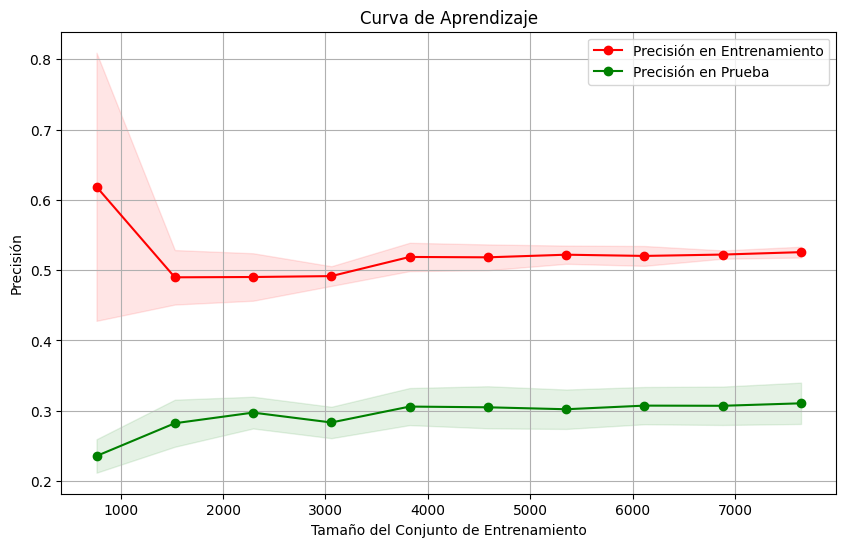

In [ ]:
n=10
model_results = cv_model(X, y, KNeighborsClassifier(n_neighbors = n),f'knn-{n}', model_results)

10 Fold CV Score: 0.3325 with std: 0.02141


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


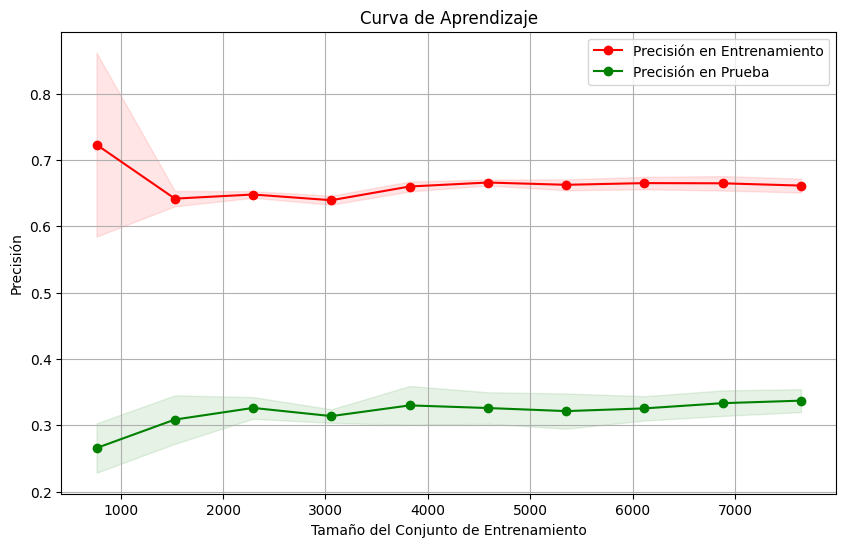

In [ ]:
n=5
model_results = cv_model(X, y, KNeighborsClassifier(n_neighbors = n),f'knn-{n}', model_results)

10 Fold CV Score: 0.27835 with std: 0.04052


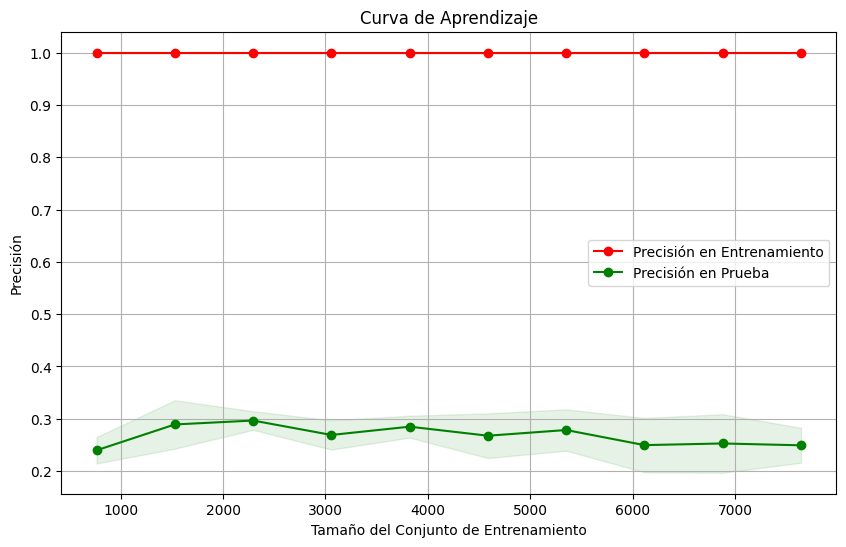

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(X, y, ExtraTreesClassifier(n_estimators = 50, random_state = 100),'EXT', model_results)

10 Fold CV Score: 0.36248 with std: 0.04149


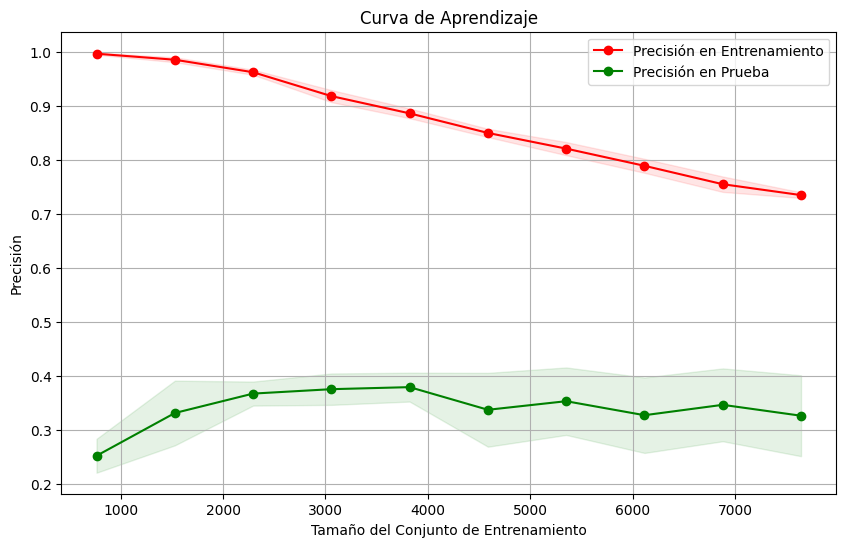

In [ ]:
model_results = cv_model(X, y,RandomForestClassifier(random_state=100, n_jobs=4, n_estimators=50, min_impurity_decrease=1e-3, min_samples_leaf=1, class_weight= 'balanced') ,'RF', model_results)

10 Fold CV Score: 0.33024 with std: 0.04197


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


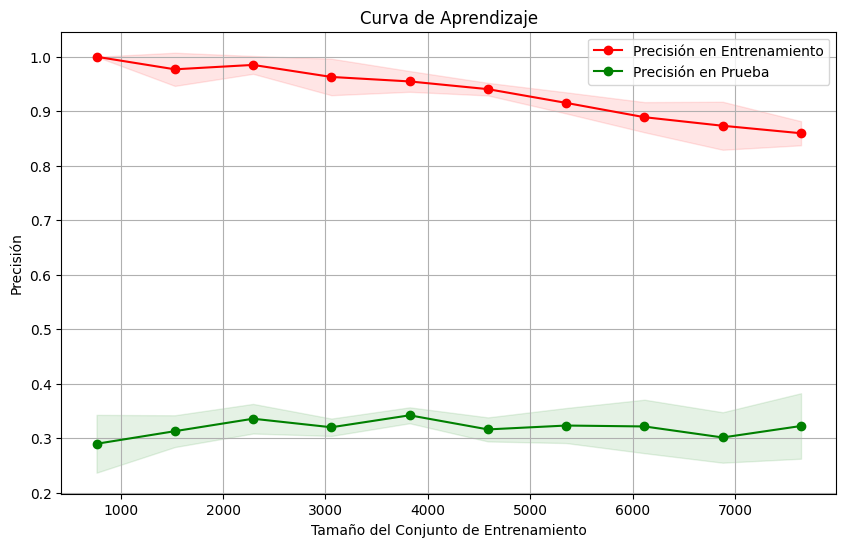

In [ ]:
model_results = cv_model(X, y,DecisionTreeClassifier(max_features= 500,max_depth=15, class_weight='balanced') ,'DTC', model_results)

10 Fold CV Score: 0.3277 with std: 0.05429


<ipython-input-11-b121dc47177d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(pd.DataFrame({'model': name, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()},index = [0]),ignore_index = True)


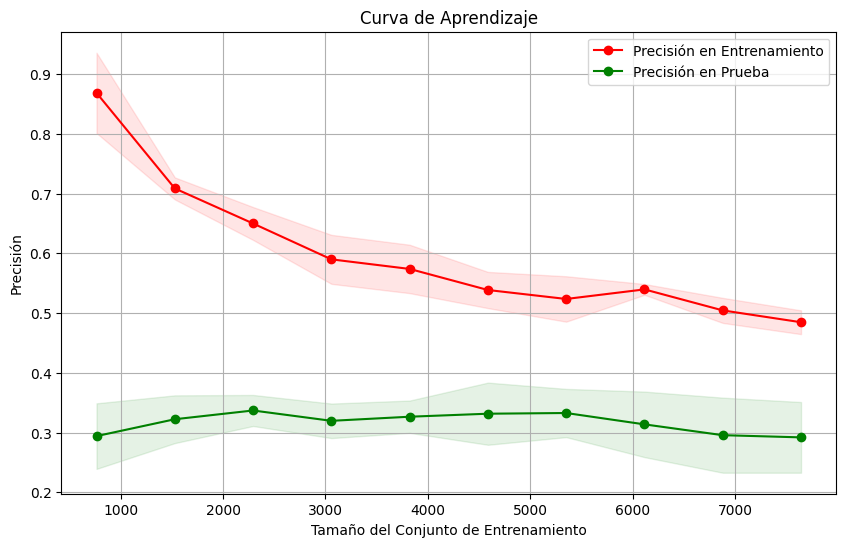

In [ ]:
model_results = cv_model(X, y,DecisionTreeClassifier(max_features= 100,max_depth=7, class_weight='balanced') ,'DTCsimple', model_results)

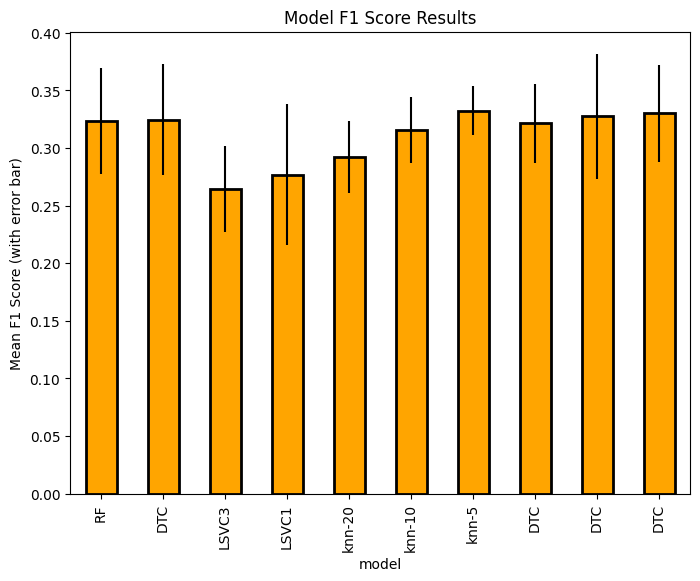

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)